In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ex1data2.txt',header=None,sep = ",")
df.columns = ['size_of_house','number_of_bedrooms','price_of_house']
df.head()

,size_of_house,number_of_bedrooms,price_of_house
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


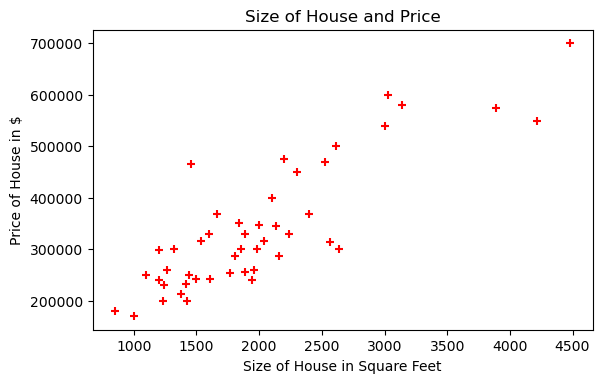

In [3]:
fig = plt.figure(dpi = 100,figsize=(5,3))
ax = fig.add_axes([1,1,1,1])

ax.scatter(x = df['size_of_house'], y = df['price_of_house'],color = 'r',marker = '+')
ax.set(xlabel = 'Size of House in Square Feet',
      ylabel = 'Price of House in $',title = 'Size of House and Price');

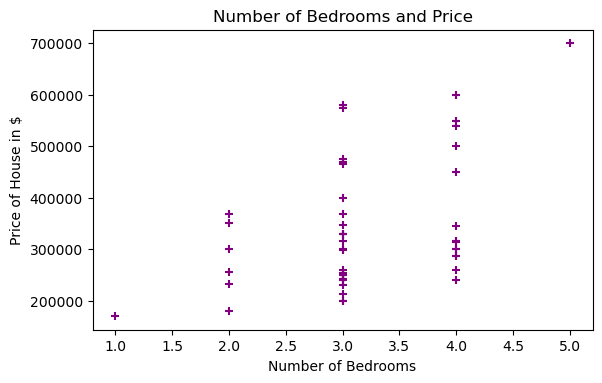

In [4]:
fig = plt.figure(dpi = 100,figsize=(5,3))
ax = fig.add_axes([1,1,1,1])

ax.scatter(x = df['number_of_bedrooms'], y = df['price_of_house'],color = 'purple',
           marker = '+')
ax.set(xlabel = 'Number of Bedrooms',
      ylabel = 'Price of House in $',title = 'Number of Bedrooms and Price');

In [5]:
x_train = df.iloc[:,:-1].values
y_train = df.iloc[:,-1].values
print(x_train.shape)
print(y_train.shape)

(47, 2)
(47,)


In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_std = ss.fit_transform(x_train)
print(x_train_std[:5,:])

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


## Gradient Descent

In [7]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(learning_rate='constant',eta0=0.01,max_iter=17000,penalty=None)
print(model)

SGDRegressor(learning_rate='constant', max_iter=17000, penalty=None)


In [8]:
model.fit(x_train_std,y_train)

SGDRegressor(learning_rate='constant', max_iter=17000, penalty=None)

In [9]:
y_pred_sgd = model.predict(x_train_std)
print(y_pred_sgd.shape)

(47,)


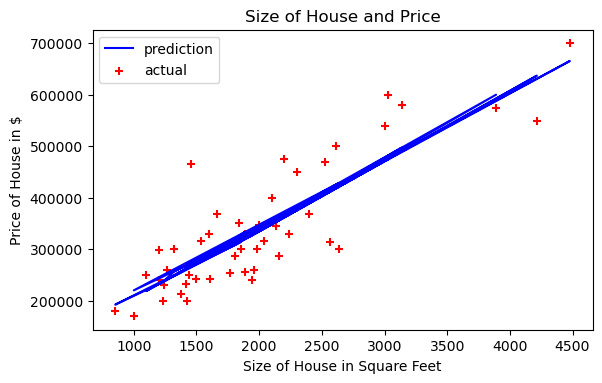

In [10]:
fig = plt.figure(dpi = 100,figsize=(5,3))
ax = fig.add_axes([1,1,1,1])

ax.scatter(df['size_of_house'].values,df['price_of_house'],color = 'red',
           marker = '+',label = 'actual')
ax.plot(df['size_of_house'].values,y_pred_sgd,color = 'blue',label = 'prediction')
ax.legend()
ax.set(xlabel = 'Size of House in Square Feet',
      ylabel = 'Price of House in $',title = 'Size of House and Price');

## ols or Normal Equation

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print(model)

LinearRegression()


In [12]:
model.fit(x_train_std,y_train)

LinearRegression()

In [13]:
y_pred = model.predict(x_train_std)
print(y_pred.shape)

(47,)


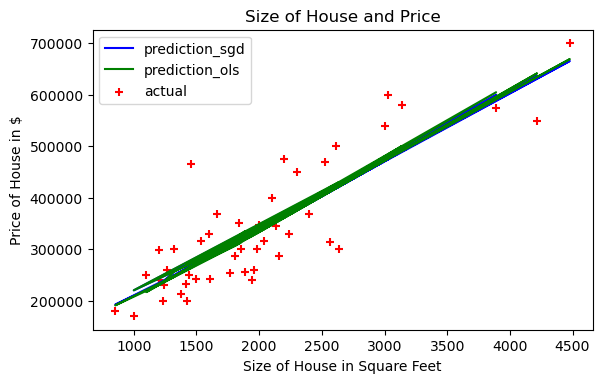

In [14]:
fig = plt.figure(dpi = 100,figsize=(5,3))
ax = fig.add_axes([1,1,1,1])

ax.scatter(df['size_of_house'].values,df['price_of_house'],color = 'red',
           marker = '+',label = 'actual')
ax.plot(df['size_of_house'].values,y_pred_sgd,color = 'blue',label = 'prediction_sgd')
ax.plot(df['size_of_house'].values,y_pred,color = 'green',label = 'prediction_ols')
ax.legend()
ax.set(xlabel = 'Size of House in Square Feet',
      ylabel = 'Price of House in $',title = 'Size of House and Price');